In [ ]:
# =========================
# Diamonds Price Prediction EDA
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load Dataset
df = pd.read_csv('../Diamonds-Price-Prediction/Data/diamonds.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(f"Dataset shape: {df.shape}")
df.head()

# Overview of Data
print(df.info())


# Check for missing values
print("Missing values per column:\n", df.isna().sum())




Dataset shape: (53940, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None
Missing values per column:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [34]:
print(df.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


#### Points to notice:

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points

Correlation of features with price:
 price     1.000000
volume    0.926002
carat     0.924922
table     0.140747
depth     0.014422
Name: price, dtype: float64


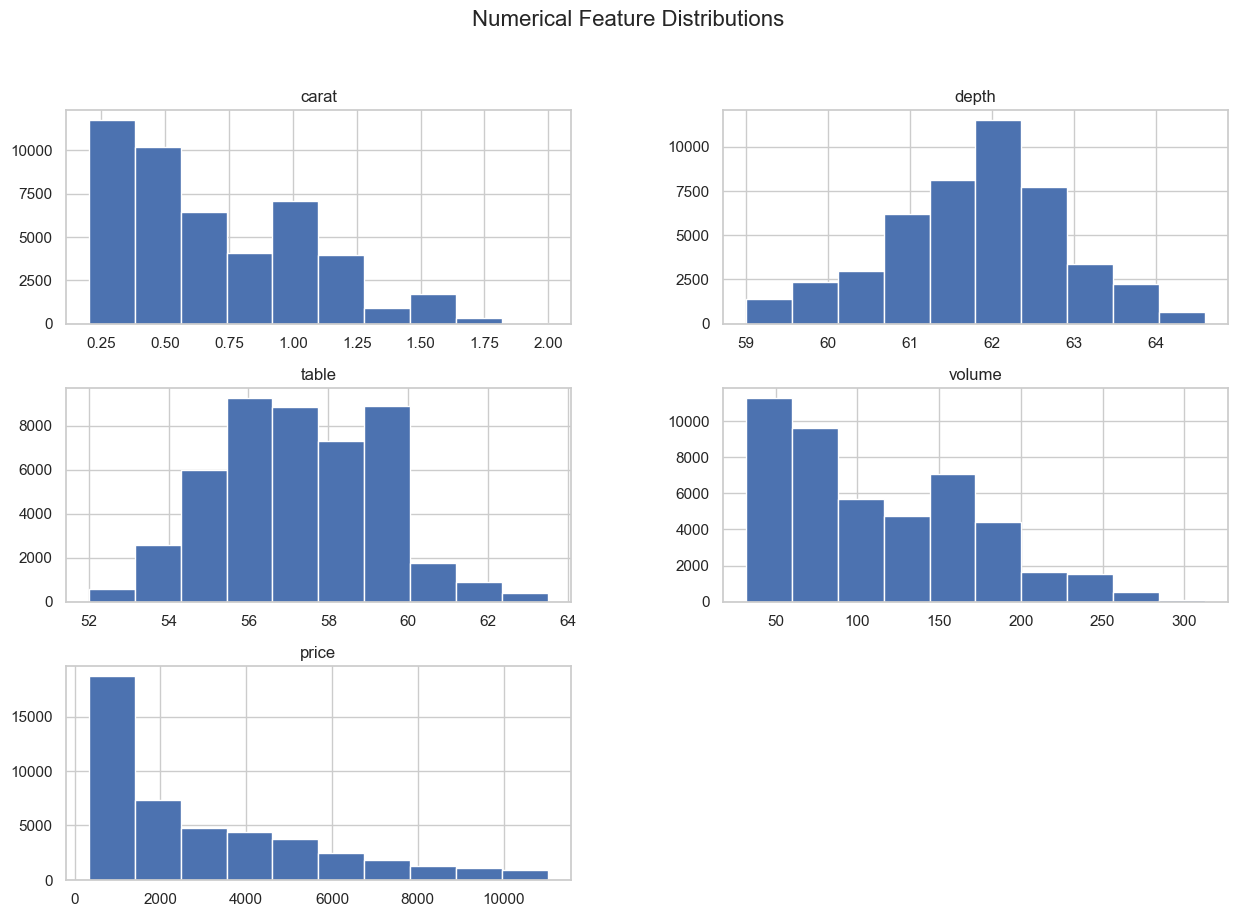

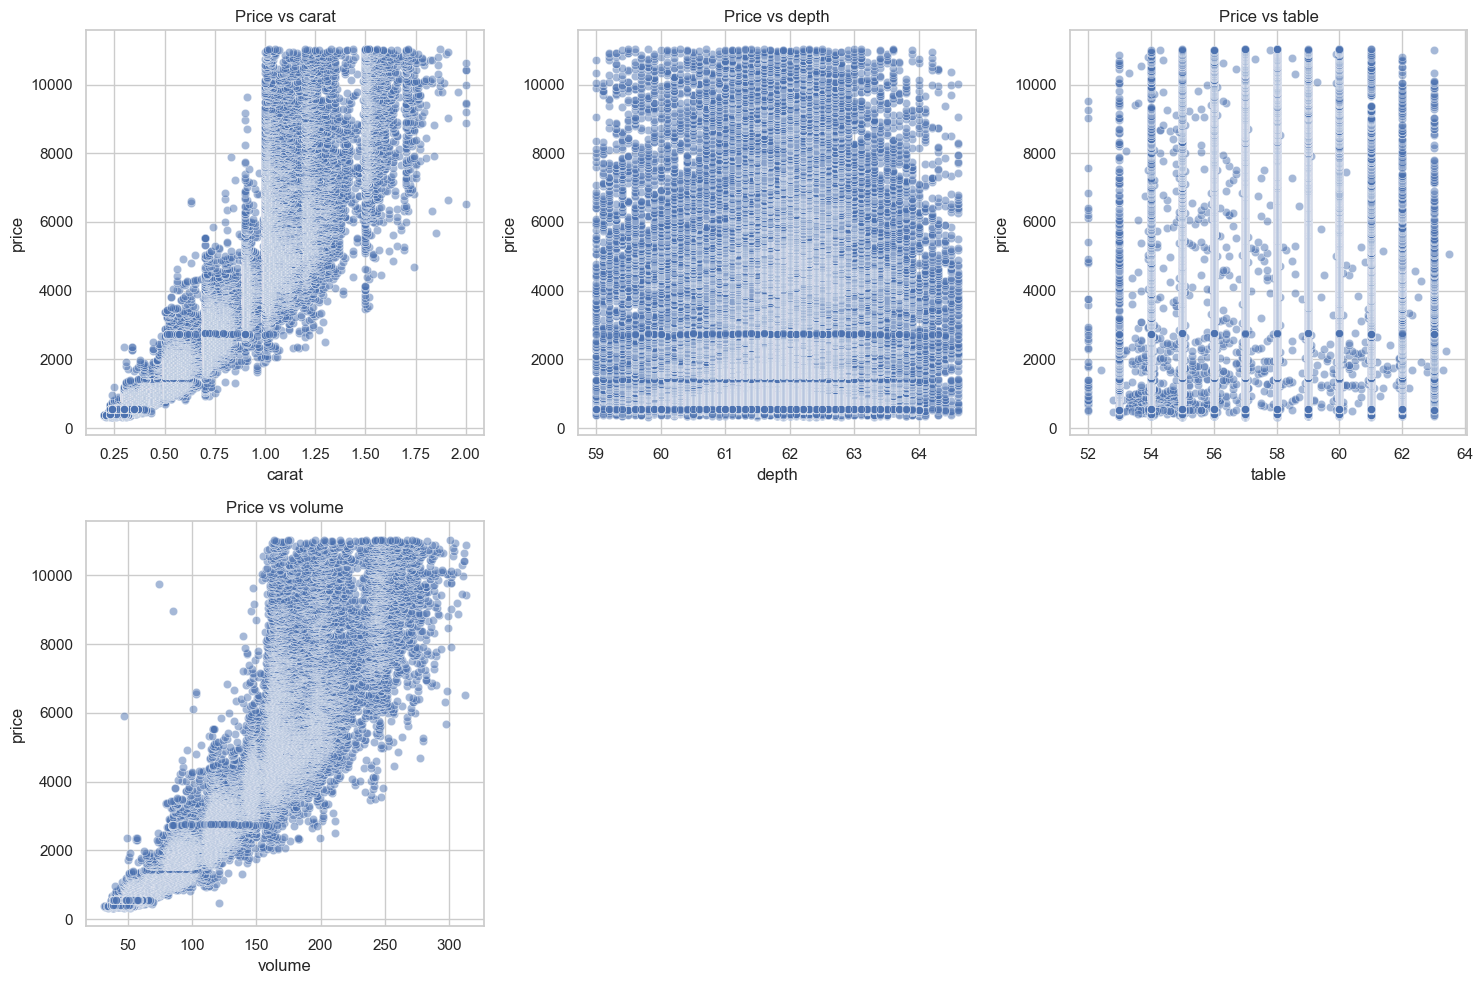

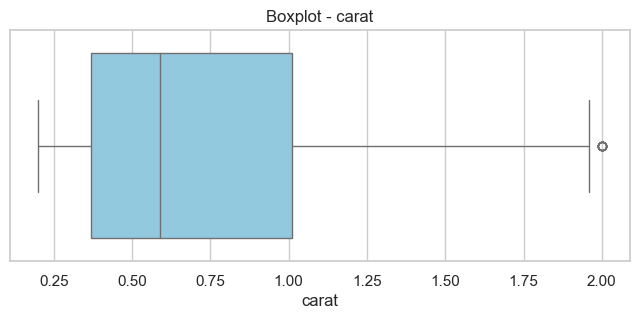

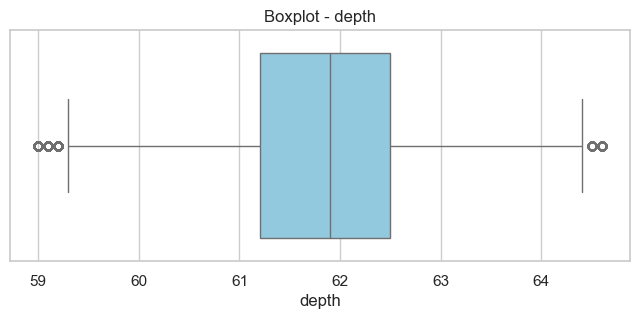

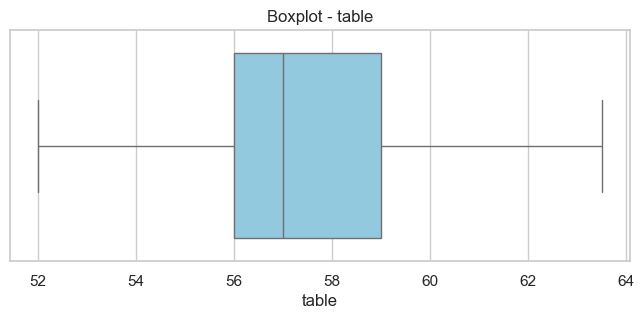

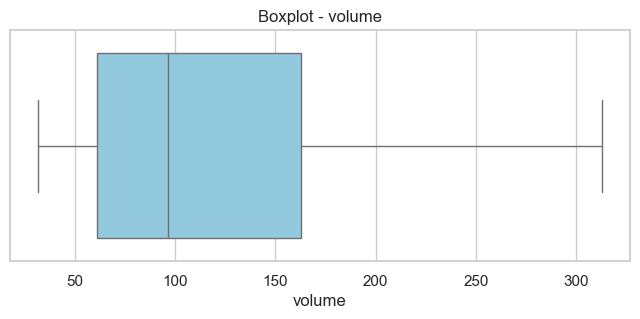

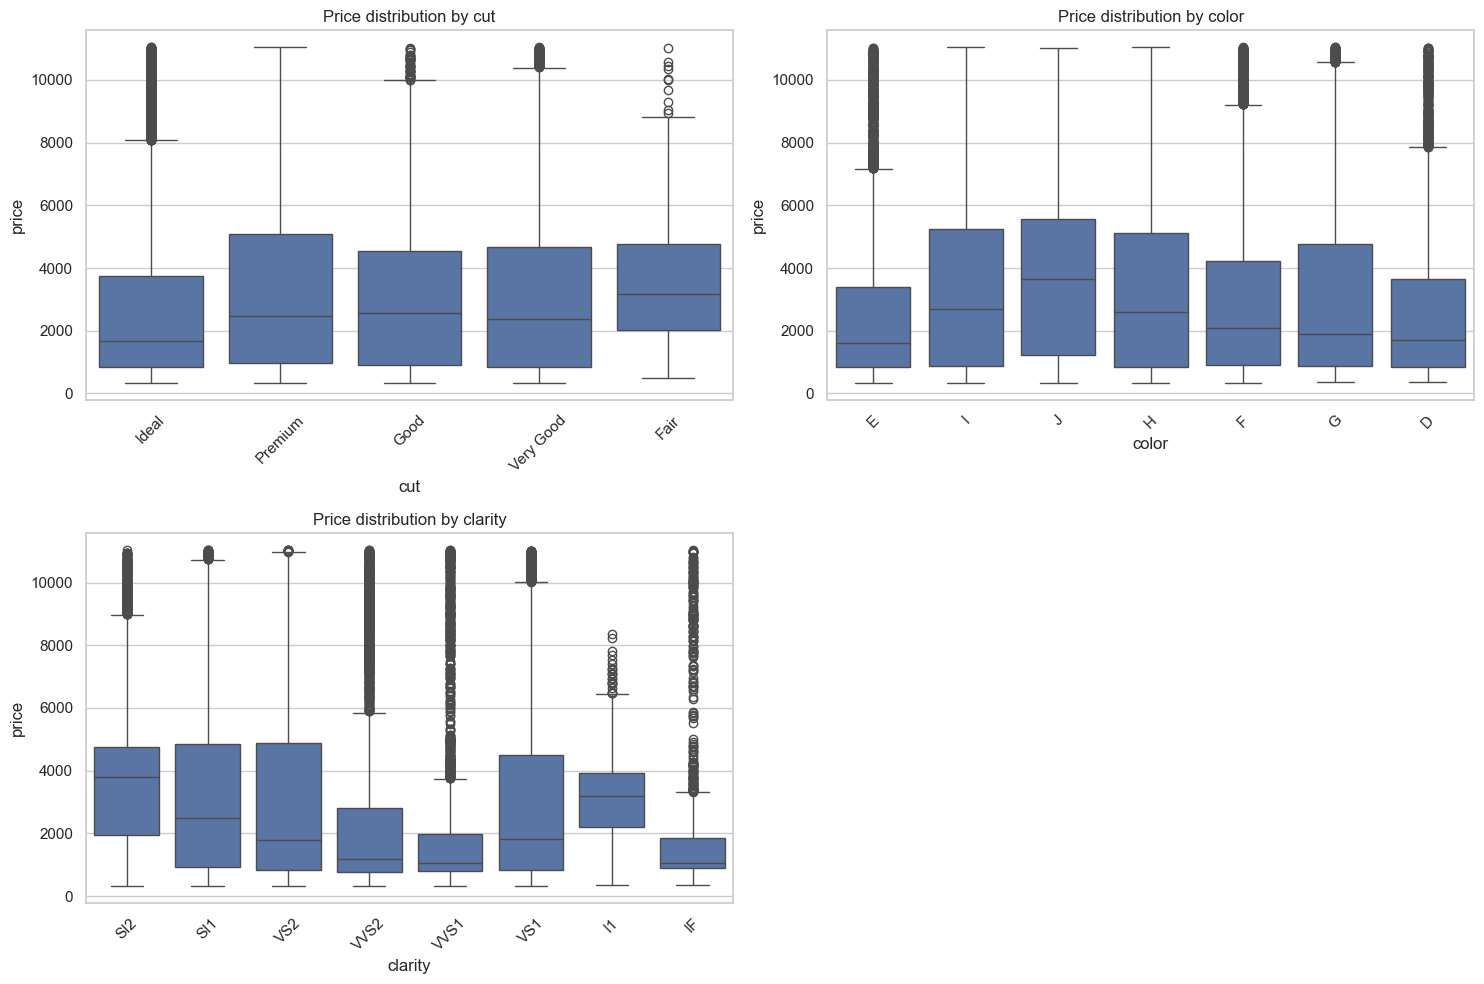


Price stats by cut:
            median         mean  count
cut                                  
Fair       3164.0  3652.730337    267
Good       2579.5  3139.419434   3674
Ideal      1659.0  2696.420665  20092
Premium    2469.5  3333.263714  11740
Very Good  2360.0  3124.410949  10741

Price stats by color:
        median         mean  count
color                            
D      1708.0  2564.165101   6069
E      1625.0  2489.110755   8740
F      2088.0  2951.986123   8287
G      1899.0  3089.483629   9865
H      2611.5  3340.226074   6980
I      2682.0  3519.366400   4375
J      3639.5  3825.380801   2198

Price stats by clarity:
          median         mean  count
clarity                            
I1       3199.0  3236.934641    459
IF       1044.0  1958.498146   1618
SI1      2499.5  3133.497604  11270
SI2      3790.0  3692.446150   7233
VS1      1815.0  3038.419057   7252
VS2      1792.0  2984.518989  10717
VVS1     1057.0  1974.043030   3393
VVS2     1178.5  2621.082021   4

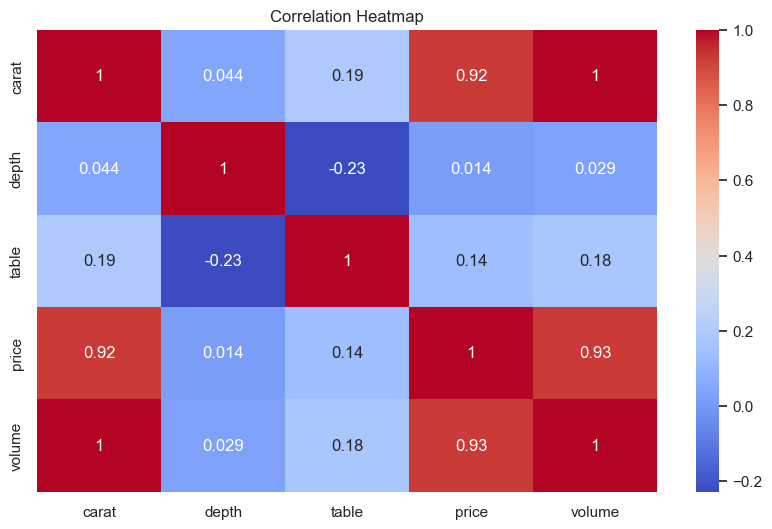

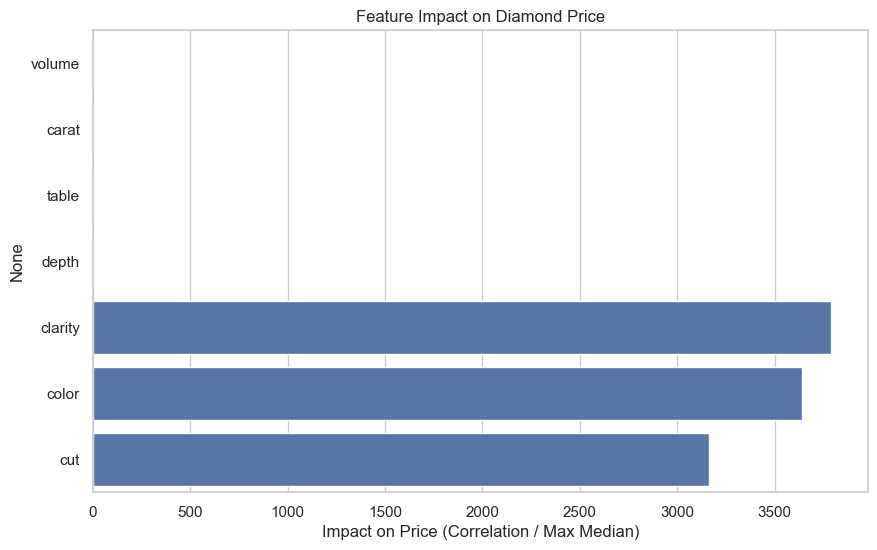

In [48]:
# =========================
#  Numerical Features Analysis
# =========================

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('price')

# Correlation with price
corr_with_price = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print("Correlation of features with price:\n", corr_with_price)

# Histogram of numerical features
df[numerical_features + ['price']].hist(figsize=(15,10))
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()

# Scatterplots: numerical features vs price
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x=col, y='price', alpha=0.5)
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

# Outlier detection with boxplots
for col in numerical_features:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot - {col}")
    plt.show()

# =========================
# Categorical Features Analysis
# =========================

categorical_features = df.select_dtypes(include='object').columns.tolist()

# Boxplots: categorical vs price
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=col, y='price')
    plt.title(f'Price distribution by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Median and mean price per category
for col in categorical_features:
    print(f"\nPrice stats by {col}:\n", df.groupby(col)['price'].agg(['median','mean','count']))

# =========================
#  Correlation Heatmap
# =========================

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# =========================
#  Feature Impact Summary (Numerical + Categorical)
# =========================

# Numerical feature impact: correlation with price
num_corr = df.corr(numeric_only=True)['price'].drop('price').sort_values(key=abs, ascending=False)

# Categorical feature impact: max median price per category
cat_medians = {}
for col in categorical_features:
    cat_medians[col] = df.groupby(col)['price'].median().max()
cat_medians = pd.Series(cat_medians).sort_values(ascending=False)

# Combine numerical and categorical
feature_impact = pd.concat([num_corr, cat_medians])

# Plot feature impact
plt.figure(figsize=(10,6))
sns.barplot(x=feature_impact.values, y=feature_impact.index)
plt.xlabel("Impact on Price (Correlation / Max Median)")
plt.title("Feature Impact on Diamond Price")
plt.show()

Before removing zero dimensions: (53940, 10)
After removing zero dimensions: (53920, 10)


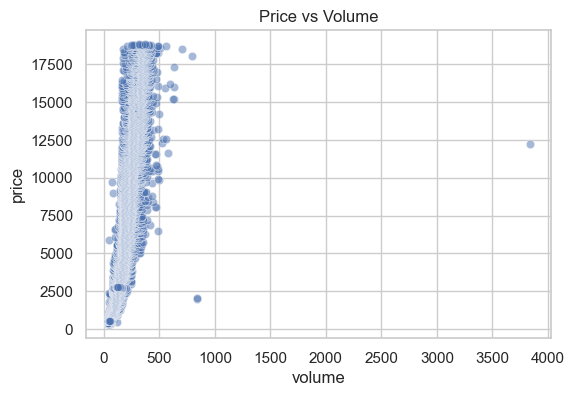

In [ ]:
# =========================
#  Data Preprocessing & Feature Engineering
# =========================

#  Remove faulty records (x, y, z = 0)
print("Before removing zero dimensions:", df.shape)
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]
print("After removing zero dimensions:", df.shape)

#  Create new feature - volume (x * y * z)
df['volume'] = df['x'] * df['y'] * df['z']

# Visualize new feature relation
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['volume'], y=df['price'], alpha=0.5)
plt.title("Price vs Volume")
plt.show()





In [ ]:
#  Handle Outliers
# We'll use the IQR method for 'carat', 'depth', 'table', 'price', and 'volume'
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = data.shape[0]
    data = data[(data[column] >= lower) & (data[column] <= upper)]
    after = data.shape[0]
    print(f"Removed {before - after} outliers from '{column}'")
    return data

for col in ['carat', 'depth', 'table', 'price', 'volume']:
    df = remove_outliers_iqr(df, col)

print("Data shape after outlier removal:", df.shape)

Removed 1883 outliers from 'carat'
Removed 2794 outliers from 'depth'
Removed 342 outliers from 'table'
Removed 2368 outliers from 'price'
Removed 19 outliers from 'volume'
Data shape after outlier removal: (46514, 11)


In [ ]:
#  Encode categorical features
# Ordinal encoding for 'cut', 'color', 'clarity' based on their quality levels
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['cut', 'color', 'clarity']])

# Get new encoded column names
encoded_cols = encoder.get_feature_names_out(['cut', 'color', 'clarity'])

# Create a DataFrame for encoded features
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)

# Combine with original DataFrame
df_encoded = pd.concat([df.drop(['cut', 'color', 'clarity'], axis=1), encoded_df], axis=1)

# Check final DataFrame
print(df_encoded.head())


   carat  depth  table  price     volume  cut_Good  cut_Ideal  cut_Premium  \
0   0.23   61.5   55.0    326  38.202030       0.0        1.0          0.0   
1   0.21   59.8   61.0    326  34.505856       0.0        0.0          1.0   
3   0.29   62.4   58.0    334  46.724580       0.0        0.0          1.0   
4   0.31   63.3   58.0    335  51.917250       1.0        0.0          0.0   
5   0.24   62.8   57.0    336  38.693952       0.0        0.0          0.0   

   cut_Very Good  color_E  ...  color_H  color_I  color_J  clarity_IF  \
0            0.0      1.0  ...      0.0      0.0      0.0         0.0   
1            0.0      1.0  ...      0.0      0.0      0.0         0.0   
3            0.0      0.0  ...      0.0      1.0      0.0         0.0   
4            0.0      0.0  ...      0.0      0.0      1.0         0.0   
5            1.0      0.0  ...      0.0      0.0      1.0         0.0   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0          0.0       

In [ ]:
#  Drop unnecessary columns
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [44]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336,38.693952


In [ ]:
#Save preprocessed data

output_path = "../Diamonds-Price-Prediction/Data/diamonds_processed.csv"
df_encoded.to_csv(output_path, index=False)

print(f"Preprocessed data saved to {output_path}")